# Part A

1.A. joint probability of the people who planned to purchase and actually placed an order - 

In [334]:
(400/2000)*100

20.0

1.B joint probability of the people who planned to purchase and actually placed an order, given that people planned to purchase

In [336]:
(400/500)*100

80.0

2.An electrical manufacturing company conducts quality checks at specified periods on the products it manufactures. Historically, the
failure rate for the manufactured item is 5%. Suppose a random sample of 10 manufactured items is selected. Answer the following
questions

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
n = 10

In [3]:
p = 0.05

In [6]:
k = np.arange(0,10)
k

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
binomial = stats.binom.pmf(k,n,p)
binomial

array([5.98736939e-01, 3.15124705e-01, 7.46347985e-02, 1.04750594e-02,
       9.64808106e-04, 6.09352488e-05, 2.67259863e-06, 8.03789063e-08,
       1.58642578e-09, 1.85546875e-11])

2.A. Probability that none of the items are defective

In [9]:
binomial[0]

0.5987369392383789

2.B. Probability that exactly one of the items is defective?

In [10]:
binomial[1]

0.31512470486230504

2.C. Probability that two or fewer of the items are defective

In [17]:
(binomial[0] + binomial[1] + binomial[2])

0.9884964426207035

2.D. Probability that three or more of the items are defective 

In [16]:
1 - (binomial[0] + binomial[1] + binomial[2] + binomial[3])

0.0010284979378902825

3. A car salesman sells on an average 3 cars per week

In [21]:
rate = 3

In [19]:
n = np.arange(0,7)

In [22]:
poisson = stats.poisson.pmf(n,rate)
poisson

array([0.04978707, 0.14936121, 0.22404181, 0.22404181, 0.16803136,
       0.10081881, 0.05040941])

3.A. What is Probability that in a given week he will sell some cars?

In [23]:
1 - poisson[0]

0.950212931632136

3.B. What is Probability that in a given week he will sell 2 or more but less than 5 cars

In [32]:
poisson[2] + poisson[3] + poisson[4] 

0.6161149710523164

3.C. Plot the poisson distribution function for cumulative probability of cars sold per-week vs number of cars sold per week

In [ ]:
n = np.arange(0,3)
poisson = stats.poisson.pmf(n,rate)
poisson

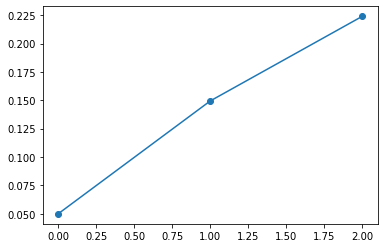

In [35]:
plt.plot(n, poisson,'o-')

4. Accuracy in understanding orders for a speech based bot at a restaurant is important for the Company X which has designed,
marketed and launched the product for a contactless delivery due to the COVID-19 pandemic. Recognition accuracy that measures the
percentage of orders that are taken correctly is 86.8%. Suppose that you place an order with the bot and two friends of yours
independently place orders with the same bot. Answer the following question

In [38]:
n = 3

In [39]:
p = 0.868

In [40]:
k = np.arange(0,4)
k

array([0, 1, 2, 3])

In [42]:
prob = stats.binom.pmf(k,n,p)
prob

array([0.00229997, 0.0453721 , 0.2983559 , 0.65397203])

4.A. What is the probability that all three orders will be recognised correctly

In [46]:
 prob[1] + prob[2] + prob[3]

0.9977000319999999

4.B. What is the probability that none of the three orders will be recognised correctly

In [47]:
 prob[0]

0.002299968

4.C. What is the probability that at least two of the three orders will be recognised correctly

In [50]:
1 - (prob[0] + prob[1] + prob[2])

0.653972032

5. Explain 1 real life industry scenario (other than the ones mentioned above) where you can use the concepts learnt in this module of
Applied Statistics to get data driven business solution

Ans: The lessons learned from Applied statistics can be used in various walks of life to make better choices. Applied statistics can be used by Healthcare, Finance, Digital Marketing company & Government organizations to make data-driven decisions that help businesses to grow further and make effective policies to make people's lives better.

A mobile SIM operator can take the help of applied statistics to understand customers' behavior and the plans they are using to recharge. Based on the past usage details, the company can create a better monthly or quarterly plan specific to a group of customers. Predict customer churn based upon the number of calls/ data utilization made in a specific duration, plans utilization, complaints raised, and their turnaround time to resolve the issue and network availability.

For a specific store in a City, a store manager can take the help of applied statistics to gain knowledge about probable footfall of customers based upon the past average and can gather information about the weekly or monthly sales of SIM cards, etc.

# Part B: Data Analysis for Basket ball teams perticipated in various tournaments

1. Importing necessary libraries and cleaning up the data

In [340]:
from matplotlib.pyplot import axis
import pandas as pd
import numpy as np
import scipy as sk
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True) 

Reading the dataset

In [341]:
basketball_df = pd.read_csv("C:\\Temp\\Learning\\GreatLearning\\Applied Statistics\\Assignment\\Part B - Coding\\Basketball.csv")

Check head and tail of the dataset along with its shape, to understand how its organized

In [342]:
basketball_df.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [343]:
basketball_df.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15
60,Team 61,1,-,-,-,-,-,-,-,-,-,2017~18,9


In [304]:
basketball_df.shape

(61, 13)

As the last row is having mostly null values, we will delete to clean up the dataset

In [344]:
basketball_df = basketball_df.iloc[:-1]
basketball_df.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
55,Team 56,1,35,38,8,11,19,36,55,-,-,2016_17,17
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15


In [306]:
basketball_df.shape

(60, 13)

From the values in each column we can see that there are some '-' values in the following columns TournamentChampion, Runner-up, also TeamLaunch column asymetrical data format, some places its 'to' some places its '-'. So lets first convert the '-' to NaN and Clean TeamLaunch column

In [345]:
basketball_df['TournamentChampion'] = basketball_df['TournamentChampion'].replace('-',np.NaN)
basketball_df['Runner-up'] = basketball_df['Runner-up'].replace('-',np.NaN)

Now lets extract useful information from TeamLaunch column. We are going to split the columns into two parts.

In [346]:
TeamLaunch_syear = [] # To store Team launch start year
TeamLaunch_eyear = [] # To store Team launch end year

In [347]:
for i in range(len(basketball_df)):
    TeamLaunch_year = basketball_df.iloc[i].TeamLaunch
    TeamLaunch_Startyear = TeamLaunch_year[:4]
    TeamLaunch_endyear=np.NaN
    if(len(TeamLaunch_year)>4):
        TeamLaunch_endyear = TeamLaunch_year[-2:]
        TeamLaunch_endyear = TeamLaunch_Startyear[:2] + TeamLaunch_endyear
    TeamLaunch_syear.append(TeamLaunch_Startyear)
    TeamLaunch_eyear.append(TeamLaunch_endyear)

In [348]:
basketball_df['TeamLaunch_syear']=TeamLaunch_syear
basketball_df['TeamLaunch_eyear']=TeamLaunch_eyear

In [349]:
basketball_df.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,TeamLaunch_syear,TeamLaunch_eyear
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,1929,NaN
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,1929,NaN
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,1929,NaN
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1,1931,1932
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,1929,NaN


Now lets check the null values in whole dataset

In [217]:
basketball_df.shape

(59, 15)

In [219]:
basketball_df.isnull().sum()

Team                    0
Tournament              0
Score                   0
PlayedGames             0
WonGames                0
DrawnGames              0
LostGames               0
BasketScored            0
BasketGiven             0
TournamentChampion     50
Runner-up              46
TeamLaunch              0
HighestPositionHeld     0
TeamLaunch_syear        0
TeamLaunch_eyear       10
dtype: int64

There are more than 50% values are NaN in TournamentChampion,Runner-up columns. So we can drop them from the dataset along with TeamLaunch as we have already splited this column into two

In [350]:
basketball_df = basketball_df.drop(['TournamentChampion','Runner-up','TeamLaunch'], axis=1)

In [351]:
basketball_df.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,HighestPositionHeld,TeamLaunch_syear,TeamLaunch_eyear
0,Team 1,86,4385,2762,1647,552,563,5947,3140,1,1929,NaN
1,Team 2,86,4262,2762,1581,573,608,5900,3114,1,1929,NaN
2,Team 3,80,3442,2614,1241,598,775,4534,3309,1,1929,NaN
3,Team 4,82,3386,2664,1187,616,861,4398,3469,1,1931,1932
4,Team 5,86,3368,2762,1209,633,920,4631,3700,1,1929,NaN


2. Performing EDA and doing Univariate, Bivariate and Multivariate analysis

Most team launched in the year



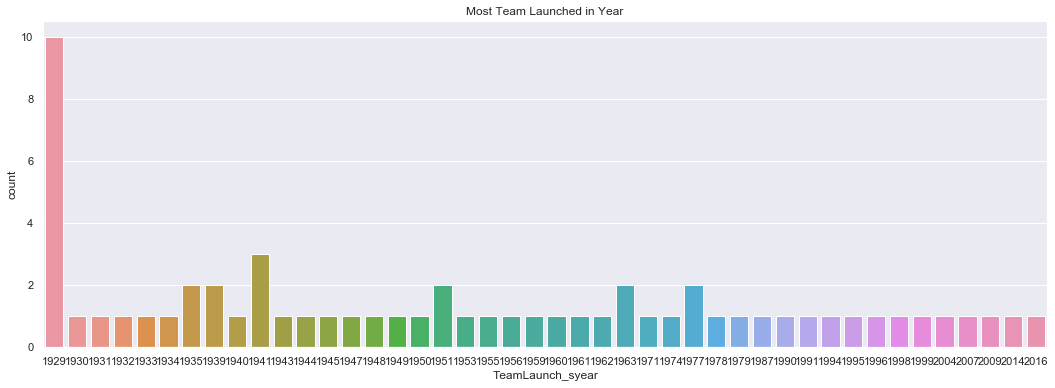

In [352]:
plt.figure(figsize = (18,6))
sns.countplot(basketball_df['TeamLaunch_syear'])
plt.title('Most Team Launched in Year')
plt.show()

So its evident that in the year of 1929, 10 teams where launched, followed by 1941 - 3 and so on

Oldest teams are

In [255]:
basketball_df[basketball_df['TeamLaunch_syear']=='1929']['Team']

0      Team 1
1      Team 2
2      Team 3
4      Team 5
6      Team 7
7      Team 8
13    Team 14
44    Team 45
51    Team 52
53    Team 54
Name: Team, dtype: object

Team with highest basket scored

In [353]:
basketball_df[basketball_df.BasketScored.astype(int) == basketball_df.BasketScored.astype(int).max()]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,HighestPositionHeld,TeamLaunch_syear,TeamLaunch_eyear
0,Team 1,86,4385,2762,1647,552,563,5947,3140,1,1929,NaN


Team with lowest basket scored


In [261]:
basketball_df[basketball_df.BasketScored.astype(int) == basketball_df.BasketScored.astype(int).min()]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,HighestPositionHeld,TeamLaunch_syear,TeamLaunch_eyear
55,Team 56,1,35,38,8,11,19,36,55,17,2016,2017


Understanding the best performing team based upon Played Games and won among it

In [262]:
basketball_df[(basketball_df['WonGames'].astype(int)/basketball_df['PlayedGames'].astype(int)) == (basketball_df['WonGames'].astype(int)/basketball_df['PlayedGames'].astype(int)).max()]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,HighestPositionHeld,TeamLaunch_syear,TeamLaunch_eyear
0,Team 1,86,4385,2762,1647,552,563,5947,3140,1,1929,NaN


And winning percentage is 

In [264]:
((basketball_df['WonGames'].astype(int)/basketball_df['PlayedGames'].astype(int)).max())*100

59.630702389572775

Understanding the worst performing team based upon Played Games and won among it

In [265]:
basketball_df[(basketball_df['WonGames'].astype(int)/basketball_df['PlayedGames'].astype(int)) == (basketball_df['WonGames'].astype(int)/basketball_df['PlayedGames'].astype(int)).min()]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,HighestPositionHeld,TeamLaunch_syear,TeamLaunch_eyear
54,Team 55,2,40,68,13,14,41,70,182,16,1950,1951


And worst performing team's winning percentage

In [267]:
((basketball_df['WonGames'].astype(int)/basketball_df['PlayedGames'].astype(int)).min())*100

19.11764705882353

In [277]:
basketball_df.describe()

,Tournament,HighestPositionHeld,Rank
count,59.000000,59.000000,59.000000
mean,24.779661,6.915254,30.000000
std,26.938031,5.256484,17.175564
min,1.000000,1.000000,1.000000
25%,4.000000,3.000000,15.500000
50%,12.000000,6.000000,30.000000
75%,40.000000,10.000000,44.500000
max,86.000000,20.000000,59.000000


Univariate analysis of Tournament played by various Teams

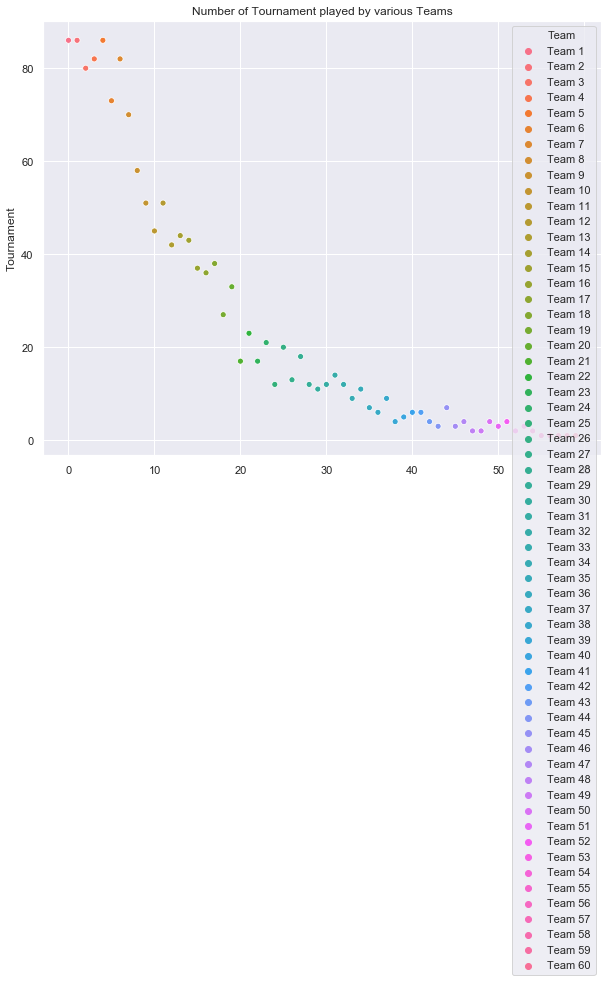

In [354]:
plt.figure(figsize=(10,8))
sns.scatterplot(basketball_df.index, basketball_df.Tournament, hue=basketball_df.Team)
plt.title('Number of Tournament played by various Teams')
plt.show()

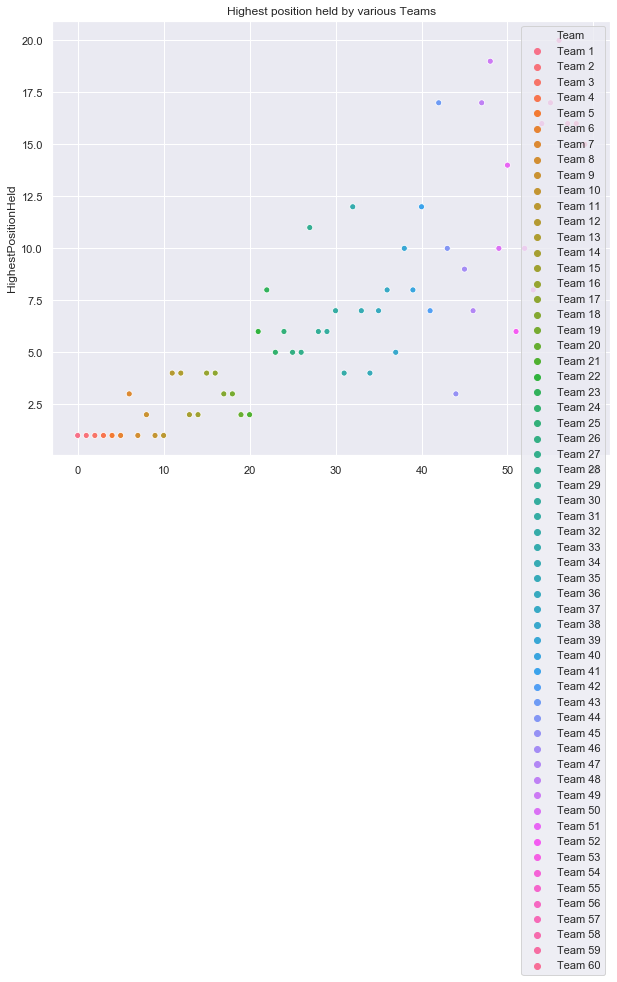

In [355]:
plt.figure(figsize=(10,8))
sns.scatterplot(basketball_df.index, basketball_df.HighestPositionHeld, hue=basketball_df.Team)
plt.title('Highest position held by various Teams')
plt.show()

Converting object column into integer to be used for various type of analysis

In [356]:
basketball_df['Score_int'] = basketball_df.Score.astype(int)
basketball_df['PlayedGames_int'] = basketball_df.PlayedGames.astype(int)
basketball_df['WonGames_int'] = basketball_df.WonGames.astype(int)
basketball_df['DrawnGames_int'] = basketball_df.DrawnGames.astype(int)
basketball_df['LostGames_int'] = basketball_df.LostGames.astype(int)
basketball_df['BasketScored_int'] = basketball_df.BasketScored.astype(int)
basketball_df['BasketGiven_int'] = basketball_df.BasketGiven.astype(int)

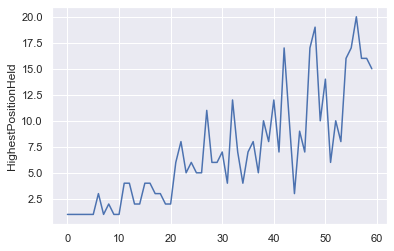

In [310]:
sns.lineplot(basketball_df.index,basketball_df.HighestPositionHeld)

In [312]:
basketball_df.columns

Index(['Team', 'Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'HighestPositionHeld',
       'Score_int', 'PlayedGames_int', 'WonGames_int', 'DrawnGames_int',
       'LostGames_int', 'BasketScored_int', 'BasketGiven_int'],
      dtype='object')

In [357]:
basketball_df = basketball_df.drop(['Score','PlayedGames','WonGames','DrawnGames','LostGames','BasketScored','BasketGiven'], axis=1)

In [358]:
basketball_df.columns

Index(['Team', 'Tournament', 'HighestPositionHeld', 'TeamLaunch_syear',
       'TeamLaunch_eyear', 'Score_int', 'PlayedGames_int', 'WonGames_int',
       'DrawnGames_int', 'LostGames_int', 'BasketScored_int',
       'BasketGiven_int'],
      dtype='object')

Multivariate Analysis

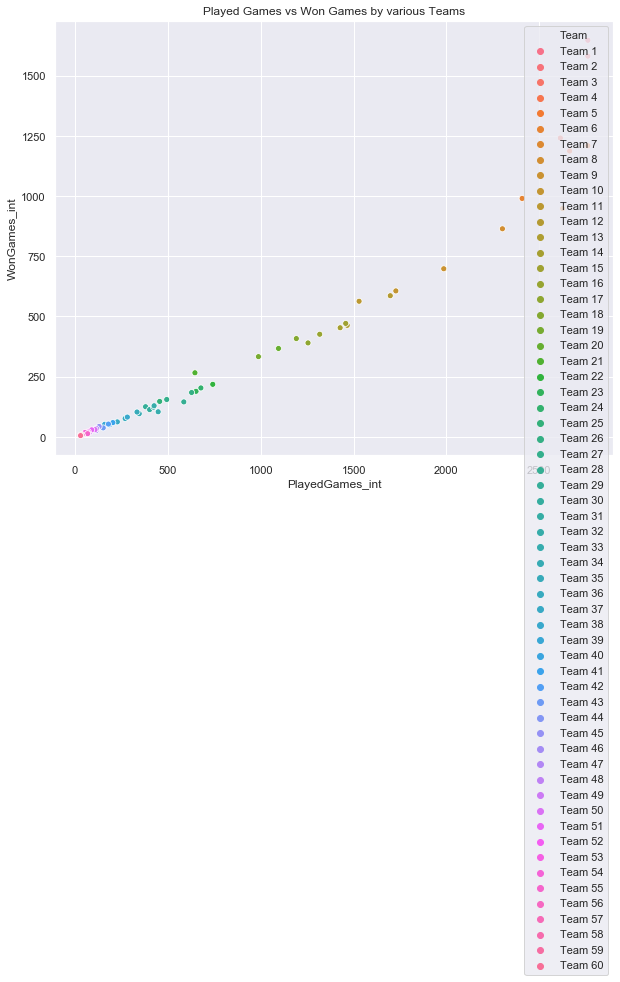

In [359]:
plt.figure(figsize=(10,8))
sns.scatterplot(basketball_df.PlayedGames_int,basketball_df.WonGames_int, hue=basketball_df.Team)
plt.title('Played Games vs Won Games by various Teams')
plt.show()

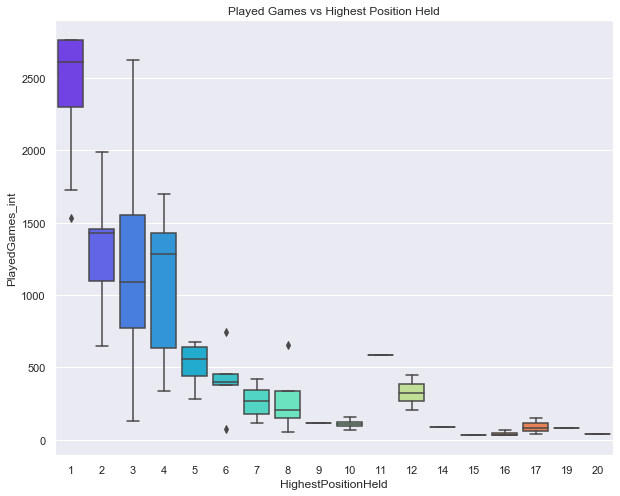

In [330]:
plt.figure(figsize=(10,8))
sns.boxplot(x=basketball_df.HighestPositionHeld,y=basketball_df.PlayedGames_int,palette='rainbow')
plt.title('Played Games vs Highest Position Held')
plt.show()

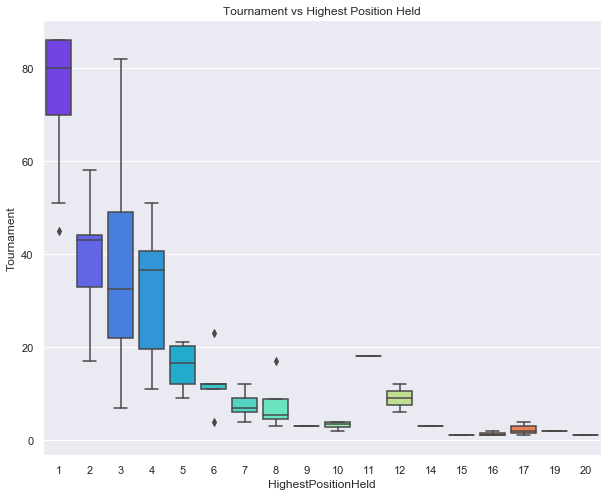

In [360]:
plt.figure(figsize=(10,8))
sns.boxplot(x=basketball_df.HighestPositionHeld,y=basketball_df.Tournament,palette='rainbow')
plt.title('Tournament vs Highest Position Held')
plt.show()

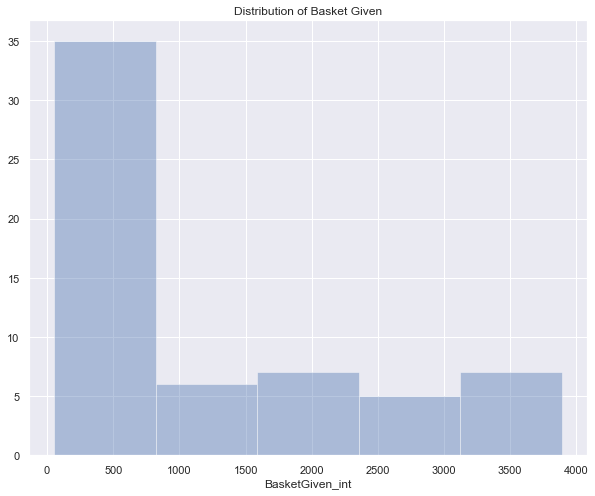

In [363]:
plt.figure(figsize=(10,8))
sns.distplot(basketball_df['BasketGiven_int'],kde = False)
plt.title('Distribution of Basket Given')
plt.show()

3. Improvements and suggestions on dataset regarding various parameter such as Quality, Quantity, Variety, Velocity, Varacity etc.

1. Quantity: The number of observations is less for performing better analysis on a particular team. Only one record per team without deeper insights on how the team performed over the years. Which could have been a better indicator for the team, how it improved/reduced its performance from the time of launch

2. Quality: Data quality depends upon how reliable the data is. Also how often the data is collected and which kind of source has been used. For the current dataset, the source is not mentioned nor how frequently data has been updated.

3. Variety: There are few varieties of data in TeamLaunch year, which makes it hard to do the calculation without extracting the necessary feature. Dataset can be improved to pick symmetrical data points for those columns.

4. Velocity: There are only 61 observations in the dataset. So it would be better to have more observations in the context of length(number of rows) as well as breadth(number of columns) to extract further insights from the data. 

5. Veracity: Data quality present in the dataset can be improved by following similar standards of input data points. The quality of the data on the columns such as Score, PlayedGames, WonGames, LostGames, DrawnGames, etc can be improved. In the current dataset, even if we are pulling individual columns as mentioned above, they are not in a form that can be used for Aggregation. So I had to convert them into integer format to use charts and graphs as well as perform group by operations.

Suggestions/Improvements: There are a lot of cells in TournamentChampion and Runner-up columns that are '-' which has to be converted to check if they are NaN. Also, the number of NaN values(after conversion) is quite high which leads us to delete those features to perform better data analysis. So this can be improved in future data collection to get improved insights.

# Part C : Data analysis for EU Sport analytics company

Importing necessary libraries

In [77]:
import pandas as pd
import numpy as np
import scipy as sk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

1. Reading data set and checking the data

In [129]:
df = pd.read_csv("C:\\Temp\\Learning\\GreatLearning\\Applied Statistics\\Assignment\\Part B - Coding\\CompanyX_EU.csv")

In [130]:
df1 = df.copy()

In [68]:
df1.head()

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating


2.A. Checking the datatype of all the attributes. We can check individually or we can check the columns of the dataframe and see dtype at the end.

In [69]:
df1.columns

Index(['Startup', 'Product', 'Funding', 'Event', 'Result', 'OperatingState'], dtype='object')

In [70]:
df1['Startup'].dtype
df1['Product'].dtype
df1['Funding'].dtype
df1['Event'].dtype
df1['Result'].dtype
df1['OperatingState'].dtype

dtype('O')

2.B. Checking for null values in all the attributes

In [71]:
df1.isnull().sum()

Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64

3.A. Drop the null values

In [72]:
df1.shape

(662, 6)

In [154]:
df1 = df1.dropna()

In [155]:
df1.shape

(446, 6)

3.B. Convert the ‘Funding’ features to a numerical value

In [156]:
df1.loc[:,'Funds_in_million'] = df1['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] =='B' else float(x[1:-1])))

In [368]:
df1.shape

(446, 7)

3.C. Plot box plot for funds in million.

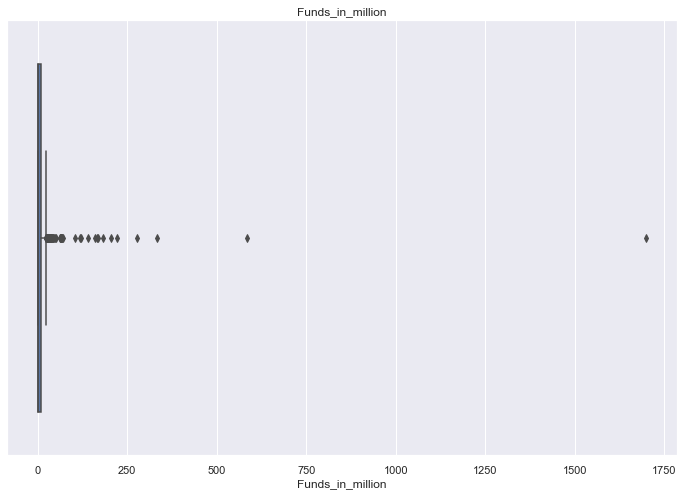

In [367]:
plt.figure(figsize =(12,8))
sns.boxplot(startup_df['Funds_in_million'])
plt.title('Funds_in_million')
plt.show()

3.D. Check the number of outliers greater than the upper fence

Ans. There are 4 outliers greater than the upper fence

3.E. Check frequency of the OperatingState features classes

In [159]:
df1['OperatingState'].unique() # Check unique values in OperatingState columns

array(['Closed', 'Operating', 'Acquired', 'Ipo'], dtype=object)

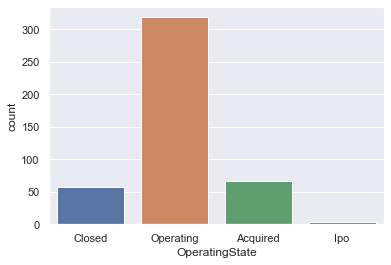

In [160]:
sns.countplot(df1['OperatingState'])
plt.show()

In [161]:
df1['OperatingState'].value_counts()

Operating    319
Acquired      66
Closed        57
Ipo            4
Name: OperatingState, dtype: int64

4.A. Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down

In [162]:
df_op_fund = df1.loc[df1['OperatingState'] =='Operating', 'Funds_in_million'].sum()
df_close_fund = df1.loc[df1['OperatingState'] =='Closed', 'Funds_in_million'].sum()

In [163]:
fund_data = [df_op_fund,df_close_fund]
fund_label = ['Operating Organization Fund','Closed Organization Fund']

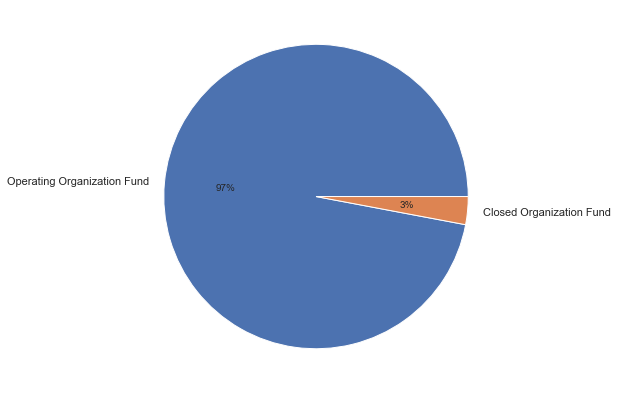

In [189]:
# define Seaborn color palette to use
plt.figure(figsize =(8,7))
plt.pie(fund_data, labels=fund_label, autopct='%.0f%%')
plt.show()

In [126]:
print('Total fund raised by companies, currently in operating state: {:.2f} millions and closing state : {:.2f} millions'.format(df_op_fund,df_close_fund))

Total fund raised by companies, currently in operating state: 6080.84 millions and closing state : 185.72 millions


There is a significant difference between amount of the two funds

4.B. Write the null hypothesis and alternative hypothesis.

Null(H0) Hypothesis : The fund raised by compaines which are currently in operating state are significantly higher than the compaines, those are currently in closed state.

Alternative(Ha) Hypothesis: The fund raised by compaines which are currently in operating state are significantly lower than the compaines, those are currently in closed state.

4.C. Test for significance and conclusion

Ans: Conclusion is that fund raised by operating companies are really high.

4.D. Make a copy of the original data frame

In [165]:
df_copy = df.copy()

In [166]:
df_copy

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating
...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating


4.E. Check frequency distribution of Result variables

In [168]:
print(df1['Result'].unique())

['Contestant' 'Audience choice' 'Finalist' 'Winner' 'Runner up']


Result
Audience choice     25
Contestant         312
Finalist            65
Runner up           19
Winner              25
dtype: int64


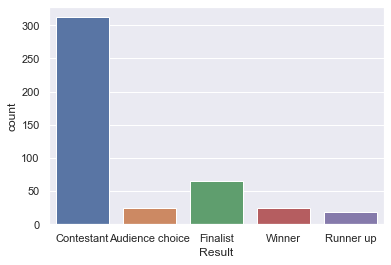

In [169]:
print(df1.groupby(['Result']).size())
sns.countplot(df1['Result'])
plt.show()

4.F. Calculate percentage of winners that are still operating and percentage of contestants that are still operating

In [172]:
group_op = df1[df1['OperatingState']=='Operating']

op_result = group_op.groupby('Result')['Result'].count()
op_result

Result
Audience choice     23
Contestant         214
Finalist            46
Runner up           18
Winner              18
Name: Result, dtype: int64

In [175]:

for i in range(len(op_result)):
    if op_result.index[i] =='Contestant':
        contestant_percentage = (op_result[i]/len(group_op))*100
        print('Contestant percentage : {:.2f} %'.format(contestant_percentage))
    if op_result.index[i] =='Winner':
        winner_percentage = (op_result[i]/len(group_op))*100
        print('Winner percentage : {:.2f} %'.format(winner_percentage))

Contestant percentage : 67.08 %
Winner percentage : 5.64 %


4.G. Write your hypothesis comparing the proportion of companies that are operating between winners and contestants

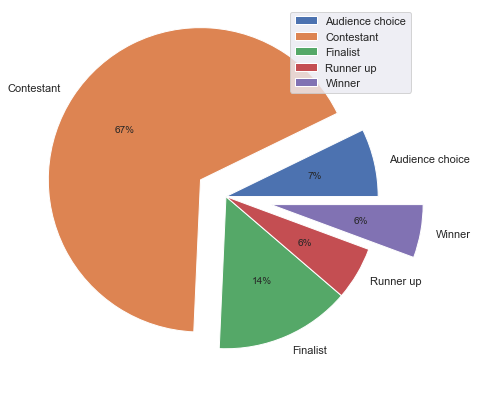

In [190]:
plot_labels = op_result.index
plt.figure(figsize = (8,7))
myexplode = [0, 0.2, 0, 0,0.3]
plt.pie(op_result, labels = plot_labels, explode= myexplode,autopct='%.0f%%')
plt.legend()
plt.show()

Null Hypothesis(H0) : Proportion of contestant companies are significatly higher than winner. Around 6 % of the companies are still operating who won and around 67 % of the companies are still operating who were contestant. So being a contestant in the startup event, increases the chance of still operating. Winning at the final event may be a distant view but the numbers of winners are tangibly low when it comes to operate the firm.

Alternate Hypothesis(Ha): Alternate hypothesis would be winning companies are being in greater number when it comes to operating the company in logn run comapared to the number of contestants in that perticular startup event.c

4.H. Test for significance and conclusion

Conclusion : Contestant companies are more in number when it comes to still operating the first that they have started.

4.I. Select only the Event that has ‘disrupt’ keyword from 2013 onwards

In [174]:
date_event = []

for i in range(len(df1)):
    event = df1.iloc[i].Event[:7]
    date_s = df1.iloc[i].Event[-4:]
    if date_s != '-':
        date_s = int(date_s)
    date_event.append(date_s)
    if event == 'Disrupt' and date_s >= 2013:
        print(df1.iloc[i].Event)


Disrupt NYC 2013
Disrupt NY 2016
Disrupt SF 2015
Disrupt London 2016
Disrupt SF 2015
Disrupt NYC 2014
Disrupt EU 2013
Disrupt SF 2015
Disrupt NY 2016
Disrupt SF 2014
Disrupt SF 2013
Disrupt NY 2016
Disrupt NY 2015
Disrupt NY 2016
Disrupt SF 2013
Disrupt NY 2015
Disrupt SF 2016
Disrupt NYC 2014
Disrupt NY 2016
Disrupt SF 2013
Disrupt SF 2013
Disrupt SF 2016
Disrupt London 2015
Disrupt NY 2015
Disrupt London 2016
Disrupt SF 2014
Disrupt NYC 2014
Disrupt SF 2015
Disrupt NY 2015
Disrupt EU 2014
Disrupt SF 2013
Disrupt EU 2014
Disrupt SF 2014
Disrupt NY 2015
Disrupt SF 2015
Disrupt EU 2014
Disrupt NYC 2014
Disrupt NYC 2013
Disrupt NYC 2013
Disrupt SF 2014
Disrupt SF 2015
Disrupt NYC 2013
Disrupt SF 2013
Disrupt SF 2013
Disrupt SF 2015
Disrupt London 2015
Disrupt NYC 2013
Disrupt NYC 2014
Disrupt SF 2016
Disrupt NY 2015
Disrupt SF 2013
Disrupt NYC 2014
Disrupt NYC 2014
Disrupt SF 2014
Disrupt SF 2014
Disrupt NYC 2013
Disrupt London 2016
Disrupt SF 2014
Disrupt SF 2014
Disrupt SF 2016
Disrupt